In [ ]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from sklearn.model_selection import train_test_split
import seaborn as sns

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

sns.set(style="ticks")
#sns.set(style="whitegrid", color_codes=True)

In [ ]:
data = pd.read_excel('BFRC_CS.xlsx')


In [ ]:
print(data.shape)

(270, 11)


In [ ]:
data.describe()

,Cement (kg/m³),Fly ash (kg/m³),Silica fume (kg/m³),Coarse aggregate (kg/m³),Fine aggregate (kg/m³),Water (kg/m³),Water reducing agent (kg/m³),Fiber diameter (mm),Fiber length (mm),Fiber content (%),Compressive strength (Mpa)
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000
mean,400.675740,45.838193,13.612376,1077.088824,704.099177,175.676276,2.943329,0.015793,16.594462,0.125893,49.260605
std,79.128978,56.696253,29.522911,186.438422,118.030548,32.874507,1.958920,0.002053,5.990241,0.122632,12.051573
min,75.785344,0.000000,0.000000,176.570677,108.673517,30.845379,0.000000,0.001848,5.920463,0.000000,0.000000
25%,350.000000,0.000000,0.000000,989.750000,613.000000,160.000000,1.080000,0.015000,12.000000,0.050000,41.625000
50%,402.000000,0.000000,0.000000,1125.000000,689.600000,175.000000,3.360000,0.015000,18.000000,0.100000,48.460000
75%,450.000000,87.000000,0.000000,1181.300000,789.250000,185.000000,4.200000,0.017300,20.000000,0.160000,59.200000
max,613.330000,168.000000,126.000000,1540.000000,1193.660000,301.000000,8.000000,0.021000,30.000000,0.730000,69.900000


In [ ]:
# split into input (X) and output (Y) variables
X = data.drop(['Compressive strength (Mpa)'], axis =1)
Y = data['Compressive strength (Mpa)']

print(X.shape)
print(Y.shape)

(270, 10)
(270,)


In [ ]:
# randomly spliting the database into training-testing sets as 70%-30%
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=42)

# normalizing the data sets
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Print the shapes of the train and test sets
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (189, 10)
y_train shape: (189,)
X_test shape: (81, 10)
y_test shape: (81,)


Different machine learning (ML) models are adopted below to predict the shear strength of concrete-filled steel tubes (CFSTs). The performances of these ML models are evaluated and compared with each other.

# Gradient Boosting Regression Tree

In [ ]:
# Hyperparameter Optimization with Grid Search
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
gradboost = GradientBoostingRegressor(random_state = 11)

n_estimators = list(range(0, 601, 20))
learning_rates = [0.02, 0.05, 0.1, 0.2]
max_depths = [3, 4, 5, 6]

params = {'n_estimators' : n_estimators, 'learning_rate' : learning_rates, 'max_depth' : max_depths}
grid_gradboost = GridSearchCV(estimator = gradboost,
                        param_grid = params,
                        scoring = 'r2',
                        cv = 5,
                        n_jobs = -1)
grid_gradboost.fit(X_train, y_train)

# extract best estimator
print(grid_gradboost.best_params_)

# to test the best fit
print(grid_gradboost.score(X_train, y_train))
print(grid_gradboost.score(X_test, y_test))

{'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 60}
0.9873392600304229
0.8489978451197223



80 fits failed out of a total of 2480.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
80 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\kulsu\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\kulsu\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 525, in fit
    self._check_params()
  File "C:\Users\kulsu\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 269, in _check_params
    raise ValueError(
ValueError: n_estimators must be greater than 0 but was 0

One or more of the test scores are non-finite: [       nan 0.33826616 0.51486001 0.60960365 0.65859513 0.6871

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
gradboost = GradientBoostingRegressor(learning_rate = 0.2, max_depth = 3, n_estimators = 60, random_state = 11)

# training the model
gradboost.fit(X_train, y_train)

# predicting the results
Y_train_gradboost = gradboost.predict(X_train)
Y_test_gradboost = gradboost.predict(X_test)

print("Training R2:", r2_score(y_train, Y_train_gradboost), "RMSE:", np.sqrt(mean_squared_error(y_train, Y_train_gradboost)),
      "MAE:", mean_absolute_error(y_train, Y_train_gradboost))
print("Testing R2:", r2_score(y_test, Y_test_gradboost), "RMSE:", np.sqrt(mean_squared_error(y_test, Y_test_gradboost)),
      "MAE:", mean_absolute_error(y_test, Y_test_gradboost))

Training R2: 0.9873392600304229 RMSE: 1.3424006341639396 MAE: 0.9771624632040269
Testing R2: 0.8489978451197223 RMSE: 4.666348762137309 MAE: 3.0689722166456868


In [ ]:
# Calculate Mean Absolute Percentage Error (MAPE) for both training and testing sets
mape_train = np.mean(np.abs((y_train - Y_train_gradboost) / y_train)) * 100
mape_test = np.mean(np.abs((y_test - Y_test_gradboost) / y_test)) * 100
print(f"Mean Absolute Percentage Error (MAPE) - Training: {mape_train:.4f}%")
print(f"Mean Absolute Percentage Error (MAPE) - Testing: {mape_test:.4f}%")

Mean Absolute Percentage Error (MAPE) - Training: inf%
Mean Absolute Percentage Error (MAPE) - Testing: 8.9936%


In [ ]:
## convert your array into a dataframe
df_pred = pd.DataFrame (Y_test_gradboost)
df_pred.to_excel('Pred_gradboost_test.xlsx')


## convert your array into a dataframe
df_pred = pd.DataFrame (Y_train_gradboost)
df_pred.to_excel('Pred_gradboost_train.xlsx')

In [ ]:
# Step 5: Save the model and scaler
joblib.dump(gradboost, 'gradboost.joblib')  # Save the trained XGBoost model
joblib.dump(scaler, 'scaler.joblib')  # Save the scaler

print("Model and scaler saved successfully.")

Model and scaler saved successfully.


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
X does not have valid feature names, but StandardScaler was fitted with feature names


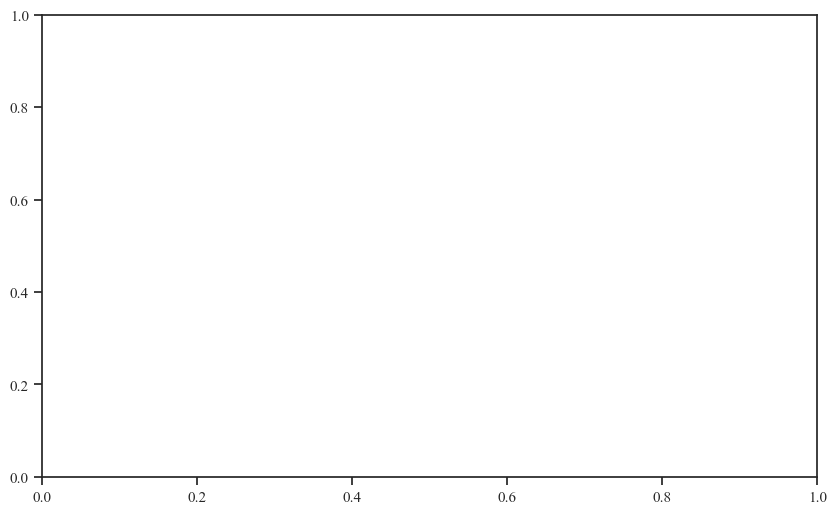

In [ ]:
import tkinter as tk
from tkinter import messagebox
import pandas as pd
import numpy as np
import shap
import joblib
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Matplotlib style
plt.style.use('seaborn-ticks')
plt.rcParams["font.family"] = "Times New Roman"

# Feature names (customize as needed)
featureName = [
    r'$\mathbf{Cement\ (kg/m^3)}$',
    r'$\mathbf{Fly\ ash\ (kg/m^3)}$',
    r'$\mathbf{Silica\ fume\ (kg/m^3)}$',
    r'$\mathbf{Coarse\ aggregate\ (kg/m^3)}$',
    r'$\mathbf{Fine\ aggregate\ (kg/m^3)}$',
    r'$\mathbf{Water\ (kg/m^3)}$',
    r'$\mathbf{Water\ reducing\ agent\ (kg/m^3)}$',
    r'$\mathbf{Fiber\ diameter\ (mm)}$',
    r'$\mathbf{Fiber\ length\ (mm)}$',
    r'$\mathbf{Fiber\ content\ (\%)}$'
]

# Initialize the Tkinter window
root = tk.Tk()
root.title("GUI")
root.geometry("950x700")

# Create canvas for displaying the SHAP plot
frame_canvas = tk.Canvas(root)
frame_canvas.pack(fill=tk.BOTH, expand=True)

# Load model and scaler
try:
    gradboost = joblib.load('gradboost.joblib')
    scaler = joblib.load('scaler.joblib')
except Exception as e:
    messagebox.showerror("Error", f"Error loading model or scaler: {e}")
    root.destroy()

# Load data for prediction and SHAP calculation
def load_data_and_plot():
    try:
        # Load data from Excel file
        df = pd.read_excel("BFRC_CS.xlsx")

        # Assuming the data includes the relevant features and the target variable
        X = df.iloc[:, :-1]  # Features (excluding target variable)
        y = df.iloc[:, -1]  # Target variable (Concrete Compressive Strength)

        # Standardize the features
        X_scaled = scaler.transform(X)

        # Calculate SHAP values
        explainer = shap.Explainer(gradboost)
        shap_values = explainer(X_scaled)

        # Create a SHAP summary plot (Feature importance)
        fig, ax = plt.subplots(figsize=(10, 6))
        shap.summary_plot(shap_values, X_scaled, feature_names=featureName, plot_type="bar", ax=ax)

        # Display plot in Tkinter window
        canvas = FigureCanvasTkAgg(fig, master=frame_canvas)
        canvas.draw()
        canvas.get_tk_widget().pack(fill=tk.BOTH, expand=True)

    except Exception as e:
        messagebox.showerror("Error", f"Error loading data or generating SHAP plot: {e}")

# Load data and plot SHAP feature importance
load_data_and_plot()

# Function to create labels on the canvas
def create_label(text, font, fg, bg, x, y):
    label = tk.Label(root, text=text, font=font, fg=fg, bg=bg)
    frame_canvas.create_window(x, y, anchor="w", window=label)  # Now canvas can use create_window
    return label

# GUI Titles
label_inputdefinetitle2 = create_label('GUI model for Predicting Compressive Strength of BFRC',
                                      ('Comic Sans MS', 18, 'bold', 'underline'), '#0000FF', '#FFFF00', 20, 30)
label_inputdefinetitle3 = create_label('Developed by: Abul KASHEM,Pobithra Das,Sourov Paul,Kaffayatullah Khan,Abdulrahman Fahad Al Fuhaid, Md Arifuzzaman',
                                      ('Comic Sans MS', 14, 'bold'), '#C00000', '#FFFFFF', 20, 70)
label_inputdefinetitle = create_label('Input Parameters',
                                      ('Comic Sans MS', 16, 'bold'), '#000000', '#FFFFFF', 50, 120)

# Parameter Definitions (left)
param_labels = [
    'X1: Cement (kg/m³)',
    'X2: Fly Ash (kg/m³)',
    'X3: Silica Fume (kg/m³)',
    'X4: Coarse Aggregate (kg/m³)',
    'X5: Fine Aggregate (kg/m³)',
    'X6: Water (kg/m³)',
    'X7: Water Reducing Agent (kg/m³)',
    'X8: Fiber Content (%)',
    'X9: Fiber Diameter (mm)',
    'X10: Fiber Length (mm)'
]

# Draw parameter labels on left side
for i, text in enumerate(param_labels, start=1):
    create_label(text, ('Comic Sans MS', 14), '#00008B', '#FFFFFF', 50, 180 + i*40)

# Input title (right)
label_inputs = create_label('Inputs', ('Comic Sans MS', 16, 'bold'), '#000000', '#FFFFFF', 620, 180)

# Input Fields (right)
entry_fields = ['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8','X9','X10']
entries = {}
for i, field in enumerate(entry_fields, start=1):
    create_label(f'{field} = ', ('Comic Sans MS', 14, 'bold'), '#006600', '#FFFFFF', 650, 180 + i*40)
    entry = tk.Entry(root, font=('Comic Sans MS', 14, 'bold'), bg='#F0F0F0',
                     highlightbackground='#000000', highlightthickness=1, bd=0, width=20)
    frame_canvas.create_window(830, 180 + i*40, window=entry)
    entries[field] = entry

# Output Section (placed much lower)
label_output = create_label('Output:', ('Comic Sans MS', 16, 'bold'), '#000000', '#FFFFFF', 50, 650)
label_result = create_label('Compressive strength (MPa)',
                            ('Comic Sans MS', 16, 'bold'), '#C00000', '#FFFFFF', 200, 650)

# Optional: Set proper window height
root.geometry("1050x800")  # Adjust based on your needs


# Predict button command function
def predict():
    # Collect input data
    input_values = []
    for field in entry_fields:
        try:
            value = float(entries[field].get())
            if value <= 0:
                raise ValueError("Value must be positive.")
            input_values.append(value)
        except ValueError as e:
            messagebox.showerror("Error", f"Invalid input for {field}. Please enter a positive numeric value.")
            return

    input_data = np.array([input_values])
    try:
        # Predict using the model
        input_scaled = scaler.transform(input_data)
        prediction = xgboost_model.predict(input_scaled)
        label_result['text'] = f'CS = {prediction[0]:.4f} (MPa)'
    except Exception as e:
        messagebox.showerror("Error", f"An error occurred during prediction: {e}")

# Predict button
predict_button = tk.Button(root, text='Calculate', font=('Comic Sans MS', 16), command=predict, fg='#FFFFFF', bg='dark blue')
frame_canvas.create_window(750, 650, window=predict_button)

# Run the Tkinter event loop
root.mainloop()
